# Mosaic (“马赛克”)

Mosaic 是一种类似扫雷的变体逻辑谜题.

- 你需要涂黑一些方格；
- 数字表示包括它所在方格在内及周围一共九个方格内涂黑的方格数. 

> 注意这个和扫雷不大相同，因为可能存在数字为0的情况（九宫格没有涂黑的元素）。

-------

> Rules

- You have to place black cells on the grid. 

- The numbers show how many black cells are there in the neighbouring cells (horizontally, vertically and diagonally) including the number cell itself. 

<https://www.puzzle-minesweeper.com/mosaic-5x5-easy/>

In [27]:
def readGrid(path):
    with open(f"../assets/data/Mosaic/{path}.txt") as f:
        num = f.readline()
        m, n = num.split(" ")[0], num.split(" ")[1]
        grid = f.readlines()
        res = [g.strip().split(" ") for g in grid]
        return int(m), int(n), res

if __name__ == "__main__":
    m, n, grid = readGrid("60x100")
    print(m, n)
    print(len(grid), len(grid[0]))
    

60 100
60 100


PUZZLE: new, 30x30; ACTUAL: 30x30
NumConflicts: 0
NumBranches: 0
WallTime: 0.00562


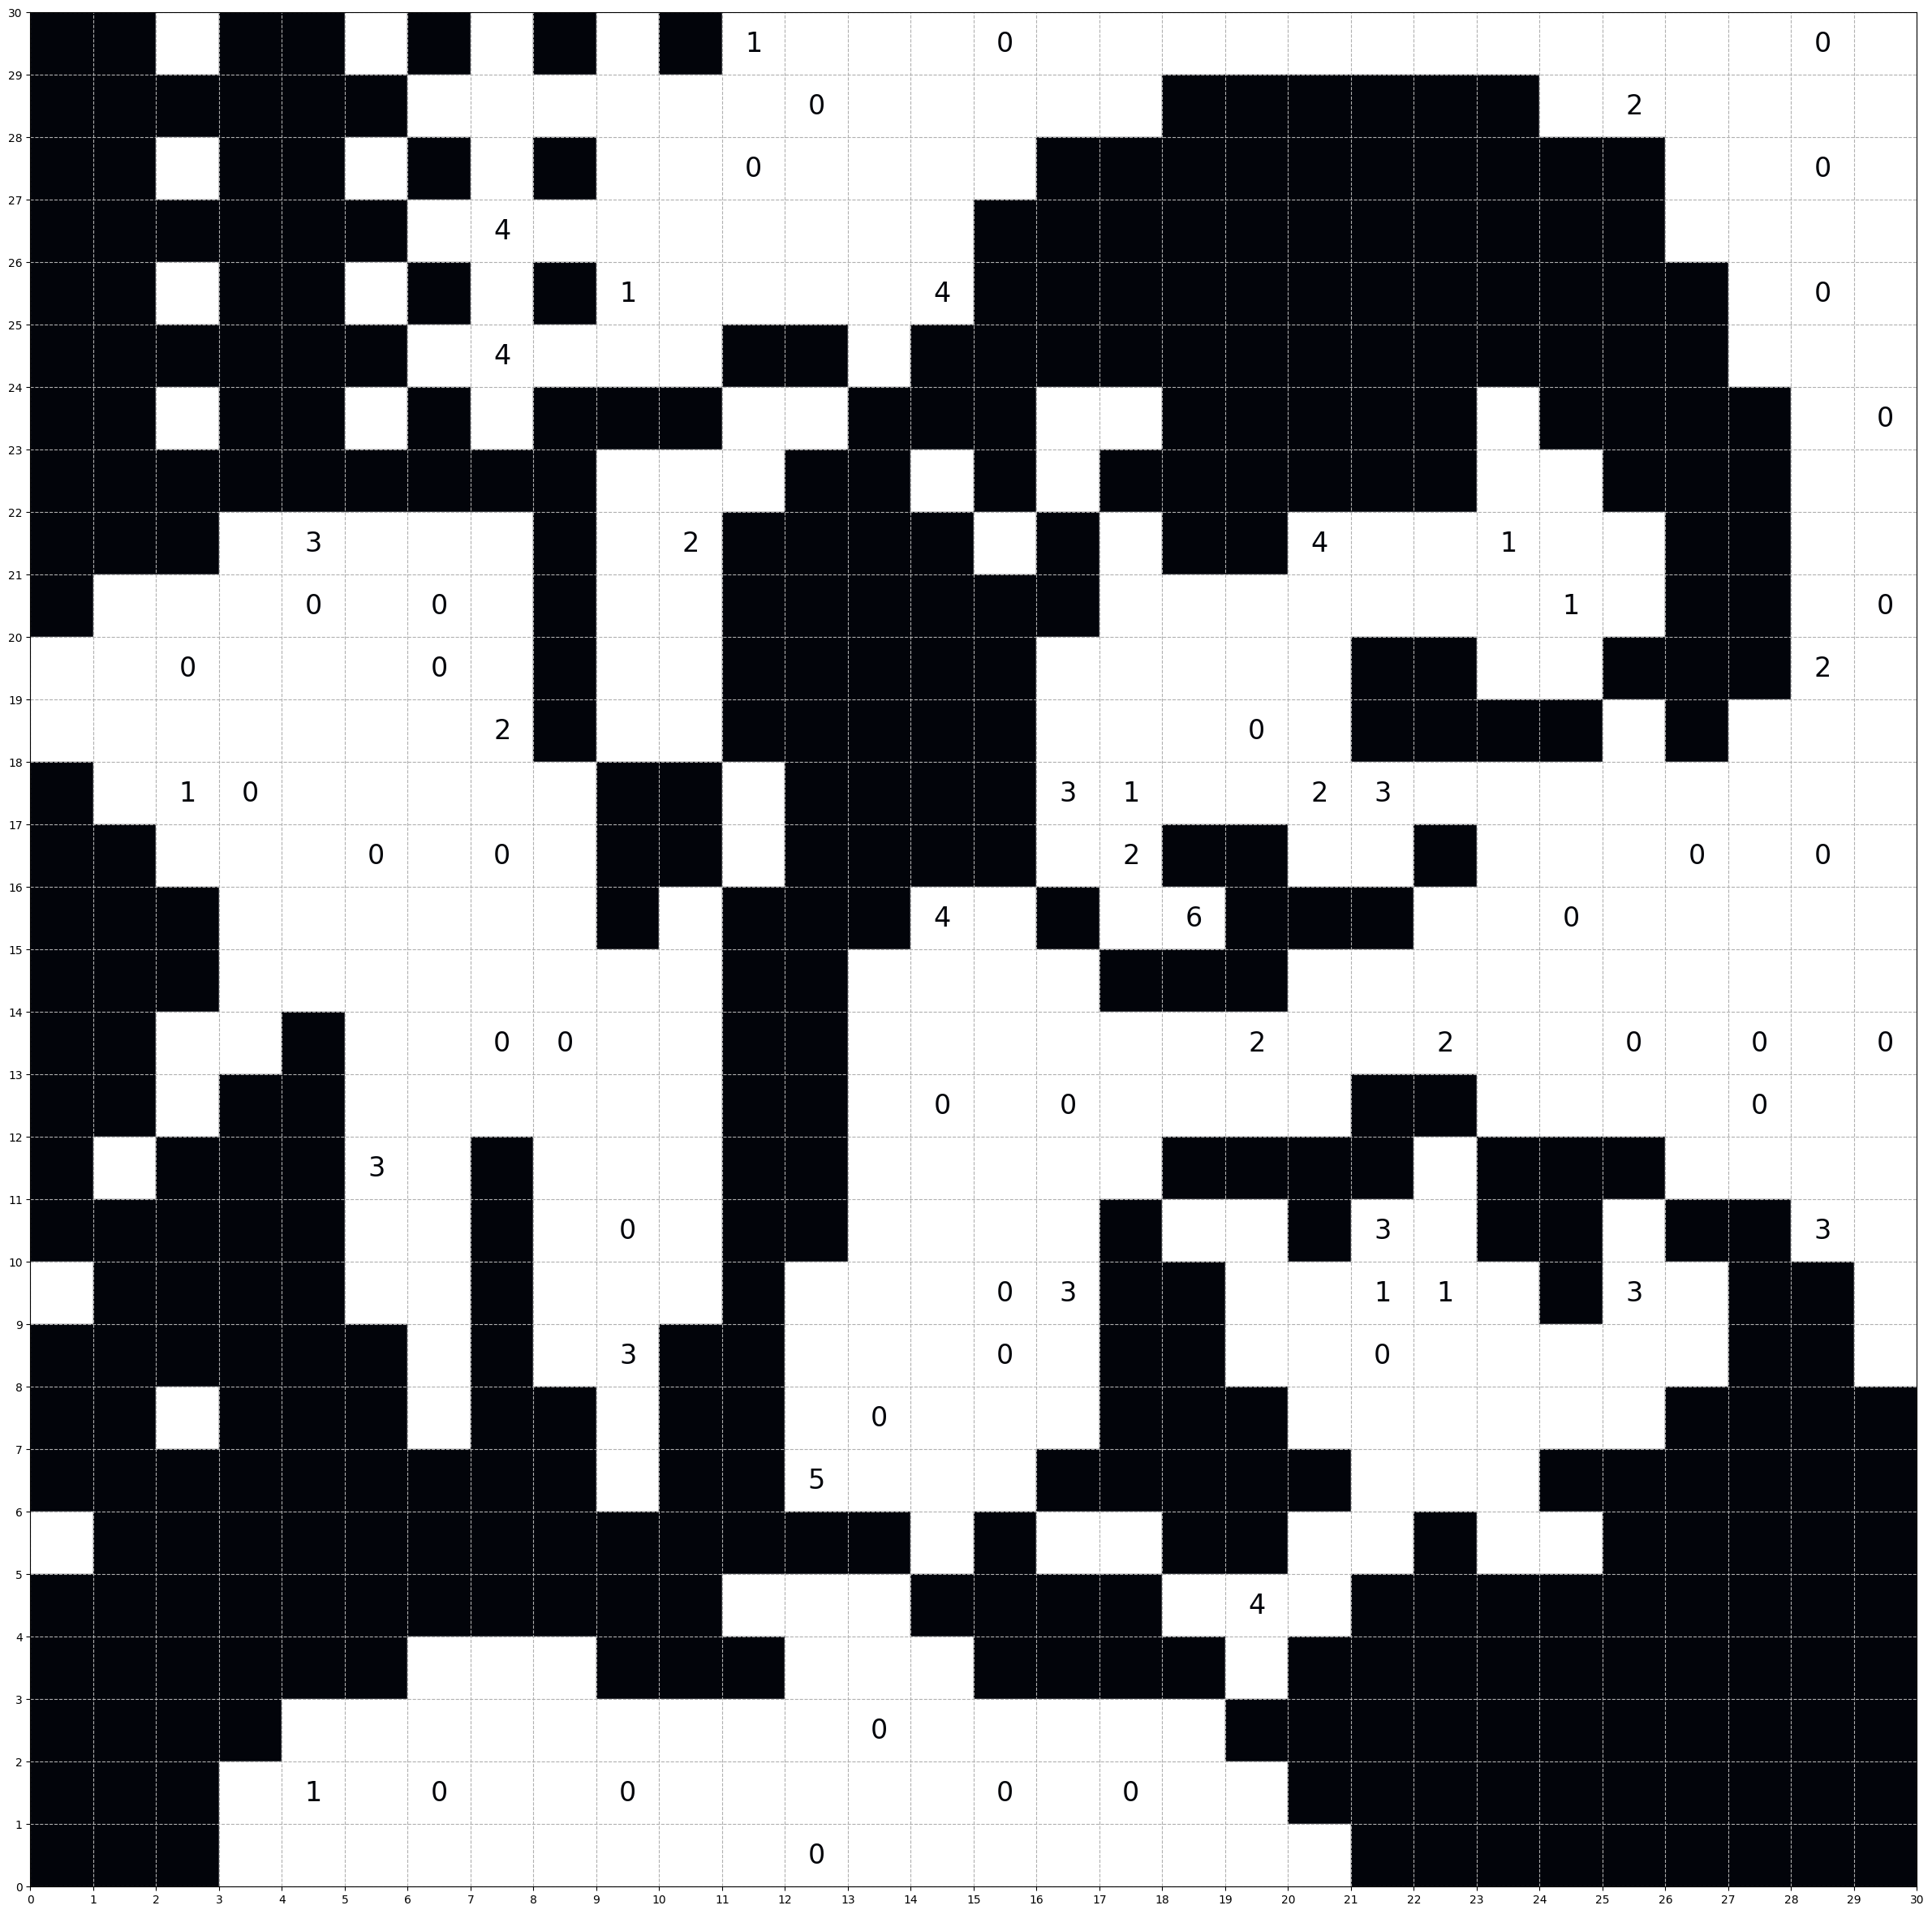

In [33]:
from __future__ import print_function
from ortools.sat.python import cp_model as cp
def GetNinePossibleNeighbours(X, Y, pos):
    
    neighbours = []
    directions = [-1, 0, 1]
    
    for xdir in directions:
        for ydir in directions:
            if (pos[0] + xdir >= X or pos[0] + xdir < 0) or (pos[1] + ydir >= Y or pos[1] + ydir < 0):
                continue
            neighbours.append((pos[0] + xdir, pos[1] + ydir))
    
    return neighbours

def MosaicSolver(X, Y, grid):
    
    model = cp.CpModel()
    x = {}
    for i in range(X):
        for j in range(Y):
            x[i, j] = model.NewBoolVar(name = f"x[{i}, {j}]")
    
    for i in range(X):
        for j in range(Y):
            num = grid[i][j]
            if num in "0123456789":

                neighbours = GetNinePossibleNeighbours(X, Y, (i, j))
                cage = [x[i[0], i[1]] for i in neighbours]
                model.Add(sum(cage) == int(num))
        
    solver = cp.CpSolver()
    status = solver.Solve(model)
    result = dict()
    if status == cp.OPTIMAL:
        for i in range(X):
            for j in range(Y):
                if solver.Value(x[i, j]) > 1e-5:
                    result[i, j] = 1
                else:
                    result[i, j] = 0
                # print(solver.Value(x[i, j]), end=" ")
        
        print("NumConflicts:", solver.NumConflicts())
        print("NumBranches:", solver.NumBranches())
        print("WallTime:", solver.WallTime())
    
    else:
        print("Can't find Optimal.")
    return result

if __name__ == "__main__":
    
    # for text in ['early', 'enchanted', 'fellower', 'fight', 'red', 'sitting', 'thorns']:
    for text in ['new']:
        m, n, grid = readGrid(text)
        print(f"PUZZLE: {text}, {m}x{n}; ACTUAL: {len(grid[0])}x{len(grid[1])}")
        result = MosaicSolver(m,n, grid)
        visual(m, n, grid, result)


In [29]:
print(result)

{(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0, (0, 7): 0, (0, 8): 0, (0, 9): 0, (0, 10): 0, (0, 11): 0, (0, 12): 0, (0, 13): 0, (0, 14): 0, (0, 15): 0, (0, 16): 0, (0, 17): 0, (0, 18): 0, (0, 19): 0, (0, 20): 0, (0, 21): 0, (0, 22): 0, (0, 23): 0, (0, 24): 0, (0, 25): 0, (0, 26): 0, (0, 27): 0, (0, 28): 0, (0, 29): 0, (0, 30): 0, (0, 31): 0, (0, 32): 0, (0, 33): 0, (0, 34): 0, (0, 35): 0, (0, 36): 0, (0, 37): 0, (0, 38): 0, (0, 39): 0, (0, 40): 1, (0, 41): 0, (0, 42): 0, (0, 43): 0, (0, 44): 0, (0, 45): 0, (0, 46): 0, (0, 47): 0, (0, 48): 0, (0, 49): 0, (0, 50): 0, (0, 51): 0, (0, 52): 0, (0, 53): 0, (0, 54): 0, (0, 55): 0, (0, 56): 0, (0, 57): 0, (1, 0): 0, (1, 1): 0, (1, 2): 0, (1, 3): 0, (1, 4): 0, (1, 5): 0, (1, 6): 0, (1, 7): 0, (1, 8): 0, (1, 9): 0, (1, 10): 0, (1, 11): 0, (1, 12): 0, (1, 13): 0, (1, 14): 0, (1, 15): 0, (1, 16): 0, (1, 17): 0, (1, 18): 0, (1, 19): 0, (1, 20): 0, (1, 21): 0, (1, 22): 0, (1, 23): 0, (1, 24): 0, (1, 25): 0, (1, 26): 0,

In [ ]:
# ===== vsualzie ===== 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from matplotlib.pyplot import MultipleLocator

def visual(X, Y, grid, result):
    plt.figure(figsize = (Y, X))
    ax = plt.gca()
    x_major_locator = MultipleLocator(1)
    y_major_locator = MultipleLocator(1)
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.xlim(0,Y)
    plt.ylim(0,X)
    plt.grid(linestyle = "--")
    for i in range(X):
        for j in range(Y):
            if result[i, j] == 1:
                ax.add_patch(Rectangle((j, X - i - 1), 1, 1, color = "#02040A"))
            else:
                ax.add_patch(Rectangle((j, X - i - 1), 1, 1, color = "#ffffff"))
    for i in range(X):
        for j in range(Y):
            if grid[i][j] in "0123456789":
                ax.text(j + 0.5, X - i - 0.5 , grid[i][j], 
                        horizontalalignment = "center", 
                        verticalalignment = 'center',
                        fontsize = 24, color = "#02040A")
    plt.show()

# def coordinatesParserNodes(m, n, idx):
#     ori_x, ori_y = idx // (n + 1), idx % (n + 1)
#     return (ori_y, m - ori_x )

if __name__ == "__main__":
    visual(m, n, grid, result)

![](../assets/figures/Mosaic.png) ![](../assets/figures/Mosaic2.png)